# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os


# Import the OpenWeatherMap API key
weather_api_key = "56841c71be785243b2a78a01fe510953"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | floro
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | krasnovishersk
Processing Record 4 of Set 1 | madang
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | khandyga
Processing Record 7 of Set 1 | chegdomyn
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | shubarkuduk
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | weno
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | severo-yeniseyskiy
Processing Record 22 of Set 1

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
import os
import pandas as pd
outname = 'cities.csv'

outdir = 'dir'
if not os.path.exists(outdir):
    os.mkdir(outdir)
    
city_data_df.to_csv(f"{outdir}/{outname}", index_label="City_ID")

In [ ]:
# Read saved data
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

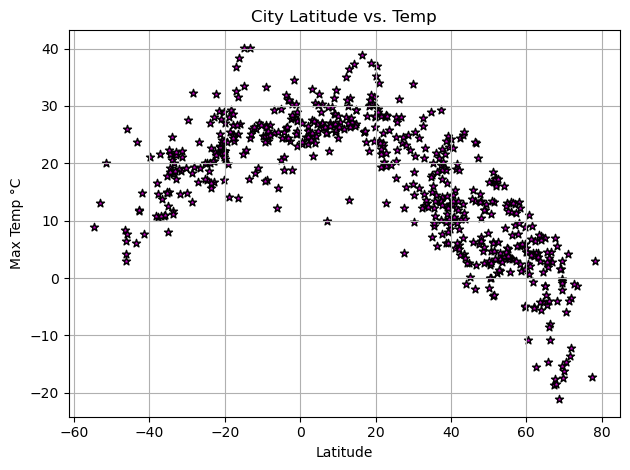

In [80]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker= '*', facecolors = 'm', edgecolors = 'k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp °C")
plt.title(f"City Latitude vs. Temp")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

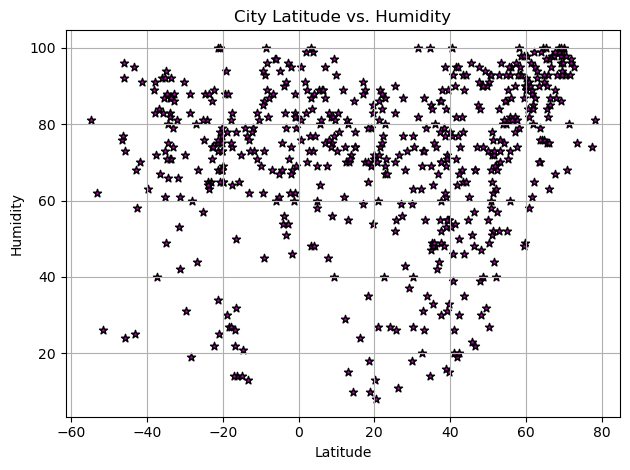

In [79]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],marker= '*', facecolors = 'm', edgecolors = 'k')

#Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

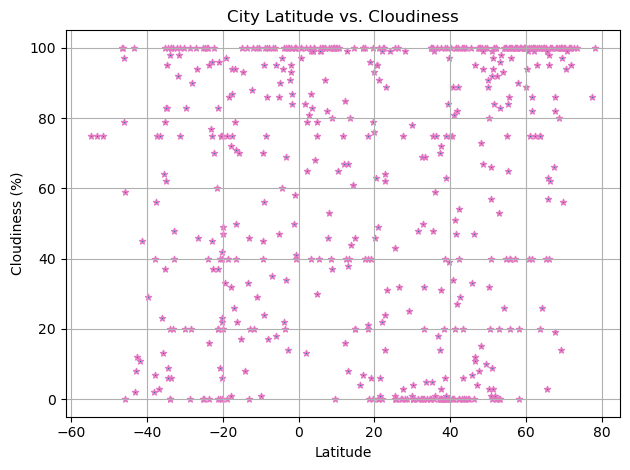

In [78]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='*', grid=True,
                  facecolors='tab:pink', edgecolors='tab:pink', title=f'City Latitude vs. Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

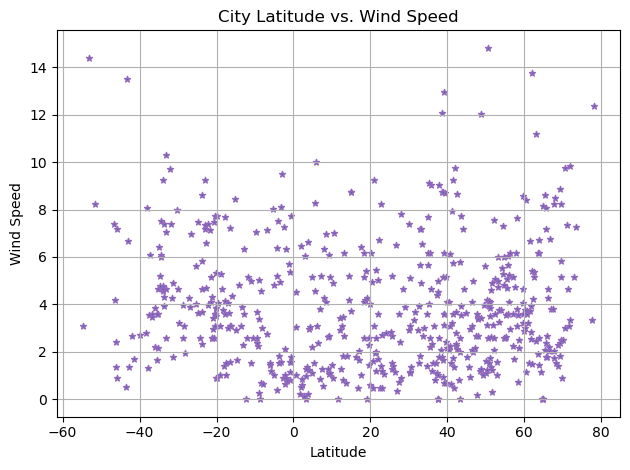

In [81]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='*', grid=True,\
                  facecolors='tab:purple', edgecolors='tab:purple', title=f'City Latitude vs. Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, name, vb1, hemi):
    (slope, intercept, rvalue, pvalue, stderror)=linregress(x,y)
    reg_values= x*slope + intercept



In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df.loc[city_data_df['Lat']>= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df =  city_data_df.loc[city_data_df['Lat']<= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.51x + 33.71


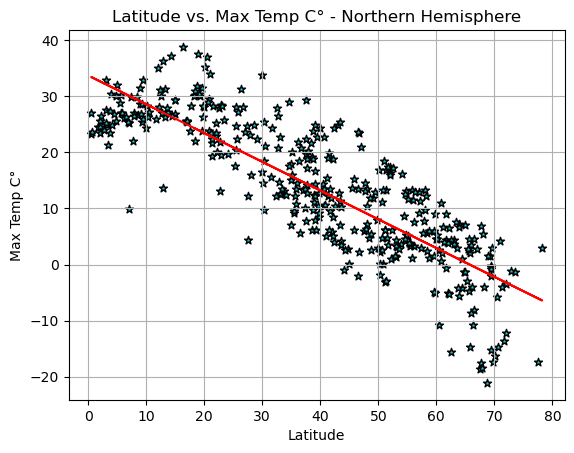

In [87]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='*', facecolors='tab:cyan', edgecolors='k')

#Graph properties 
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")
def create_linear_regression_plot(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    
    
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'Northern_Hemi_Temp_Lat'
vbl = 'Max Temp C°'
hemi = 'Northern Hemisphere'
create_linear_regression_plot(x,y,name,vbl,hemi)
plt.show()

In [7]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='*', facecolors='tab:blue', edgecolors='k')
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'Southern_Hemi_Temp_Lat'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
create_linear_regression_plot(x,y,name,vbl,hemi)
plt.show()

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** As latitude increases, max temp does too.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Northern Hemisphere - Humidity vs. Latitude
plt.linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity (%) vs. Latitude", "Humidity (%)", (40, 10))
plt.show()

In [ ]:
# Southern Hemisphere
plt.linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness (%) vs. Latitude", "Cloudiness (%)", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [53]:
import os

print( os.getcwd() )

C:\Users\Taryn\python-api-challenge\WeatherPy
